# PRÁCTICA 6 - VÍCTOR CHOZA MERINO - ADRIÁN TURIEL CHARRO
## Parte 1 - Support Vector Machines

### 1.0. Cargando datos

In [1]:
import scipy.io as sio
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = sio.loadmat('p6/ex6data1.mat')
X1 = data['X'] # (51, 2) matrix
y1 = data['y'] # (51, 1) matrix

### 1.1. Kernel lineal

In [3]:
def visualize(X, y):       
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
    plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
    plt.show()
    plt.close()

def visualize_boundary(X, y, svm):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1, x2 = np.meshgrid(x1, x2)
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
    plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
    plt.contour(x1, x2, yp)
    plt.show()
    plt.close()

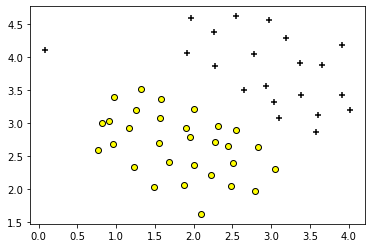

In [4]:
visualize(X1, y1)

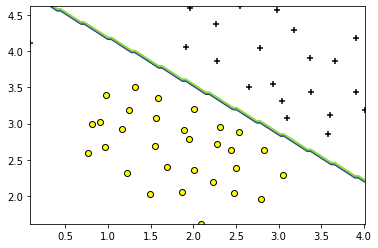

In [5]:
svm1 = SVC(kernel='linear', C=1)
svm1.fit(X1, y1.ravel())
visualize_boundary(X1, y1, svm1)

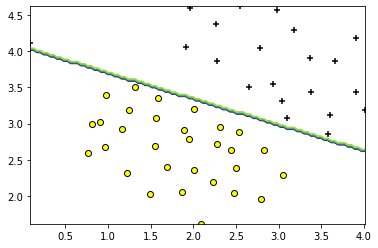

In [6]:
svm1 = SVC(kernel='linear', C=100)
svm1.fit(X1, y1.ravel())
visualize_boundary(X1, y1, svm1)

### 1.2. Kernel gaussiano

In [7]:
data = sio.loadmat('p6/ex6data2.mat')
X2 = data['X'] # (863, 2) matrix
y2 = data['y'] # (863, 1) matrix

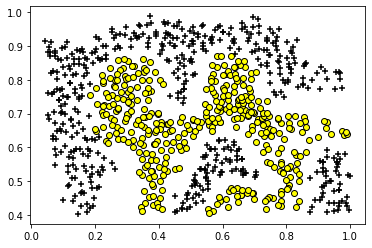

In [8]:
visualize(X2, y2)

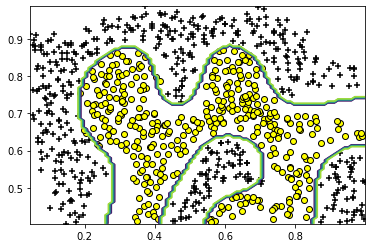

In [9]:
C = 1
sigma = 0.1

svm2 =  SVC(kernel='rbf', C=C, gamma=1/(2*sigma**2))
svm2.fit(X2, y2.ravel())
visualize_boundary(X2, y2, svm2)

### 1.3. Elección de los parámetros C y sigma

In [10]:
data = sio.loadmat('p6/ex6data3.mat')
X3 = data['X'] # (211, 2) matrix
y3 = data['y'] # (211, 1) matrix
Xval3 = data['Xval']
yval3 = data['yval']

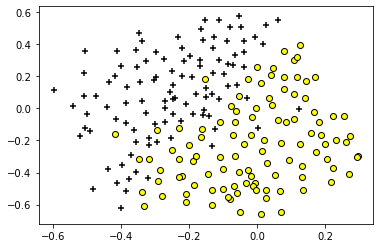

In [11]:
visualize(X3, y3)

C= 1  sigma= 0.1
Score= 0.965


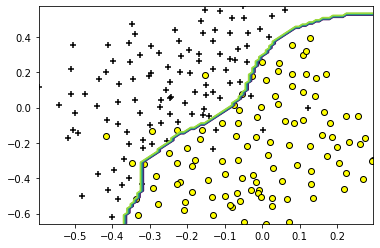

C= 1  sigma= 0.3
Score= 0.965


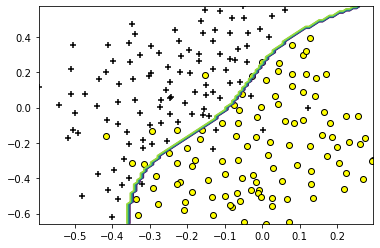

C= 3  sigma= 0.1
Score= 0.965


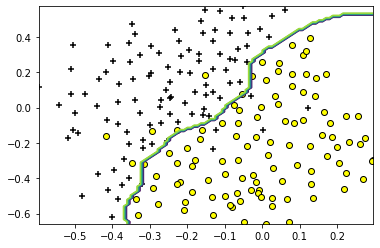

In [12]:
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))
#svm3s = np.zeros((len(C_vec), len(sigma_vec)))

for i, C_i in enumerate(C_vec):
    for j, sigma_j in enumerate (sigma_vec):
        svm3 =  SVC(kernel='rbf', C=C_i, gamma=1/(2*sigma_j**2))
        svm3.fit(X3, y3.ravel())
        #print('C=',C_i,' sigma=',sigma_j)
        #svm3s[i,j] = svm3
        scores[i,j] = accuracy_score(yval3, svm3.predict(Xval3))
        #print(scores_val[i,j])
        #visualize_boundary(X3, y3, svm3)

maxs = np.where(scores == max(scores.flatten()))


for i in range(len(maxs[0])):
    C_i = C_vec[maxs[0][i]]
    sigma_j = sigma_vec[maxs[1][i]]
    print('C=',C_i,' sigma=',sigma_j)
    print('Score=',scores[maxs[0][i],maxs[1][i]])
    svm3 =  SVC(kernel='rbf', C=C_i, gamma=1/(2*sigma_j**2))
    svm3.fit(X3, y3.ravel())
    visualize_boundary(X3, y3, svm3)

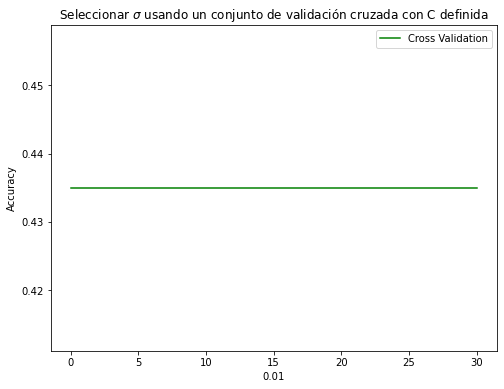

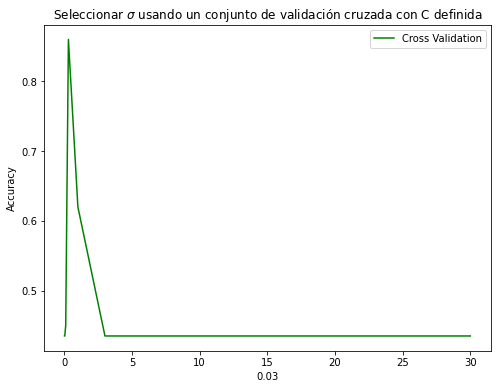

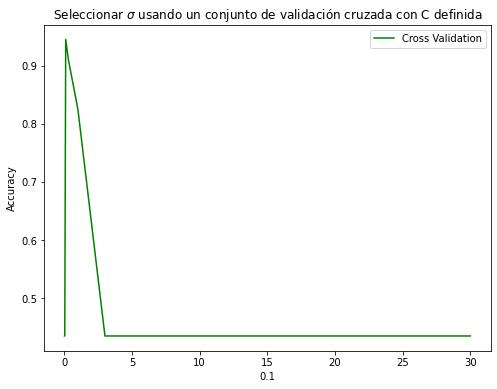

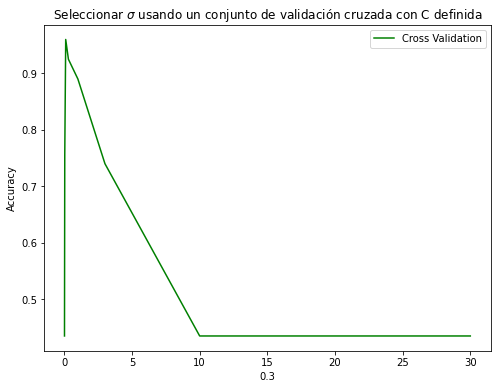

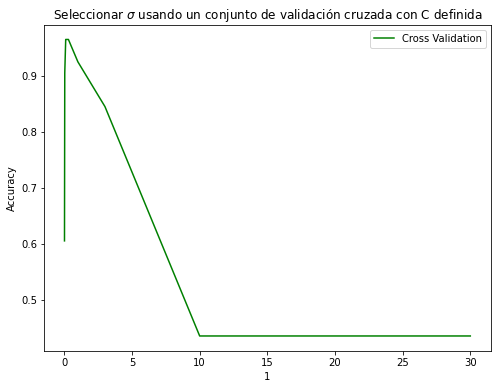

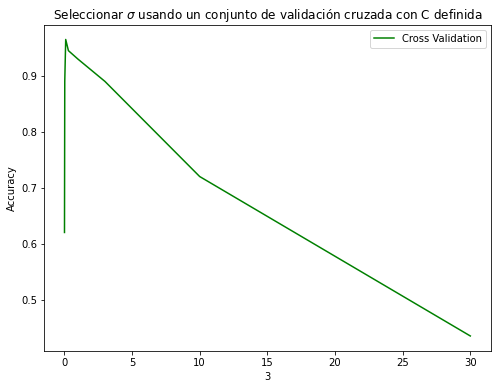

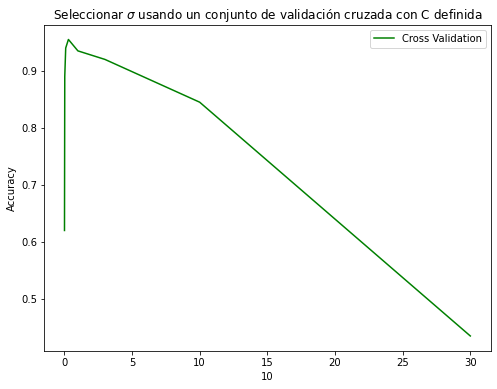

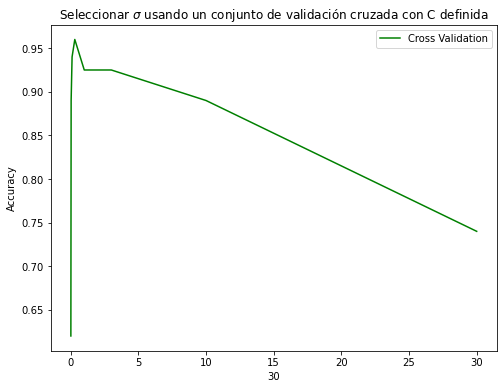

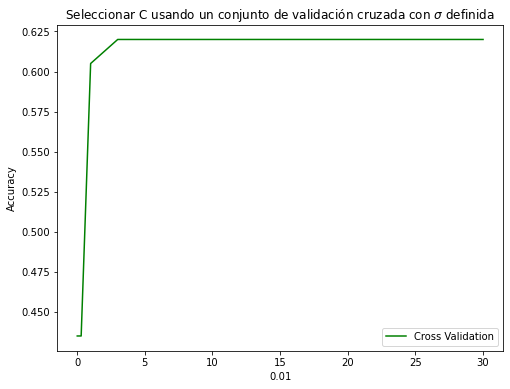

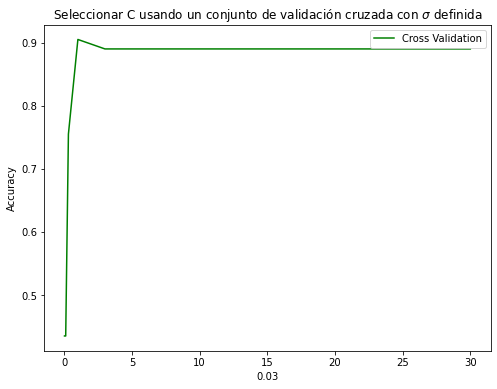

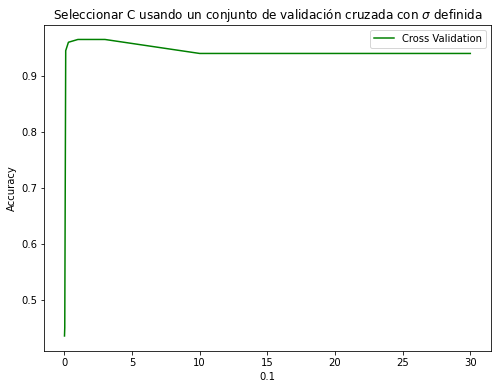

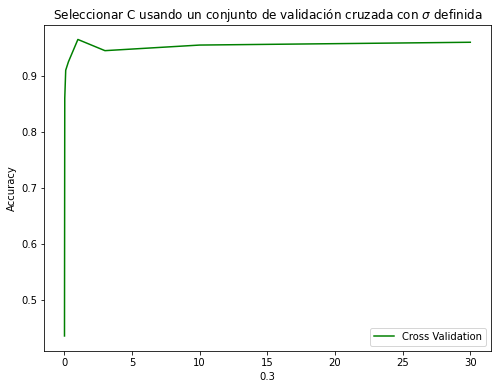

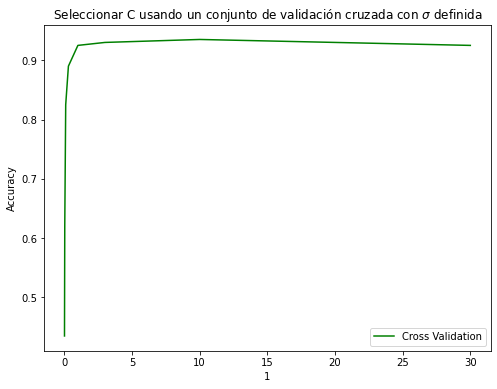

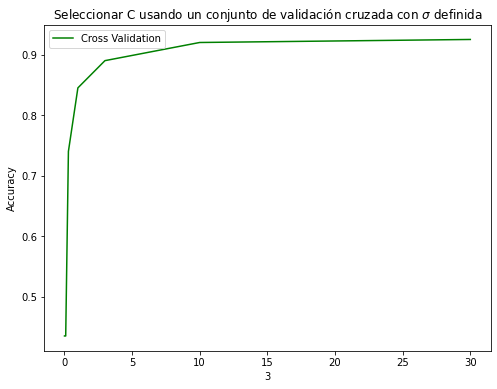

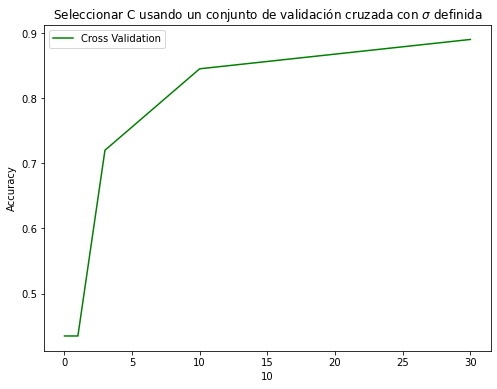

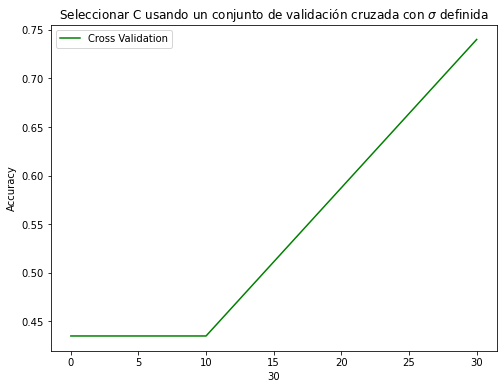

In [13]:
for i in range(len(C_vec)):
    plt.figure(figsize=(8, 6))
    plt.xlabel(C_vec[i])
    plt.ylabel('Accuracy')
    plt.title(
        'Seleccionar $\sigma$ usando un conjunto de validación cruzada con C definida')
    plt.plot(sigma_vec, scores[i,:], 'g', label='Cross Validation')
    plt.legend()
    
for j in range(len(sigma_vec)):
    plt.figure(figsize=(8, 6))
    plt.xlabel(sigma_vec[j])
    plt.ylabel('Accuracy')
    plt.title(
        'Seleccionar C usando un conjunto de validación cruzada con $\sigma$ definida')
    plt.plot(C_vec, scores[:,j], 'g', label='Cross Validation')
    plt.legend()
    

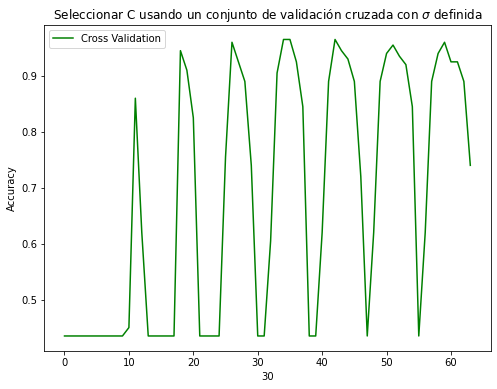

In [14]:
scores2 = scores.flatten()

plt.figure(figsize=(8, 6))
plt.xlabel(sigma_vec[j])
plt.ylabel('Accuracy')
plt.title(
    'Seleccionar C usando un conjunto de validación cruzada con $\sigma$ definida')
plt.plot(range(0, len(C_vec)*len(sigma_vec)), scores2, 'g', label='Cross Validation')
plt.legend()